
# Практическая работа 4-2: Линейная регрессия 2

Name: Шведова Софья

Email: shvedovass@mgpu.ru


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Credit.xlsx to Credit.xlsx


In [2]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Import data from Credit.csv file
credit = pd.read_excel('Credit.xlsx',index_col=0) #load data
credit["Income"] = pd.to_numeric(credit["Income"], errors='coerce')
credit["Income"] = credit["Income"] * 1000
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


In [3]:
advert = pd.read_excel('Credit.xlsx',index_col=0) #load data

ad_NL = sm.ols(formula="Limit ~ Rating", data=advert).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:53:45   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ у значения Рейтинг равно 0,994, а P значение меньше 0.05, значит модель значима и рейтинг описывает лимит на 99%

Н0 = лимит зависит от дохода, баланса, карты, возраста, образования

Н1 = лимит не зависит от дохода, баланса, карты, возраста, образования

**Проведем кросс-валидацию**

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
X = advert['Rating'].values.reshape(-1, 1)
y = advert['Limit'].values

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print('Оценки R^2:', scores)
print('Средняя квадратичная ошибка на кросс-валидации (RMSE):', np.mean(-scores))

Оценки R^2: [-21280.18755138 -40655.2198917  -39884.02968867 -32316.66634542
 -32779.10725692]
Средняя квадратичная ошибка на кросс-валидации (RMSE): 33383.042146816886


Значение RMSE равное 33383 указывает на то, что модель имеет довольно высокую ошибку на кросс-валидации

## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования лимита. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



In [5]:
Rat_Car = sm.ols(formula="Limit ~ Cards", data=advert).fit()
Rat_Car.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04167
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.838
Time:                        11:53:55   Log-Likelihood:                -3664.7
No. Observations:                 400   AIC:                             7333.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4684.6662    274.978     17.037      0.000    4144.076    5225.257
Cards         17.2219     84.369      0.204      0.838    -148.643     183.087
==============================================================================
Omnibus:                       46.466   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.069
Skew:                           0.833   Prob(JB):                     3.33e-14
Kurtosis:                       3.973   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ у значения Карты = 0.000, а P значение больше 0.05, значит модель не значима и связи между переменными нет



In [6]:
Rat_Ed = sm.ols(formula="Limit ~ Education", data=advert).fit()
Rat_Ed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2208
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.639
Time:                        11:53:58   Log-Likelihood:                -3664.7
No. Observations:                 400   AIC:                             7333.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4969.5271    511.029      9.725      0.000    3964.874    5974.180
Education    -17.3924     37.011     -0.470      0.639     -90.154      55.369
==============================================================================
Omnibus:                       47.086   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.382
Skew:                           0.837   Prob(JB):                     1.72e-14
Kurtosis:                       3.999   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ у значения Образования = 0.001, а P значение больше 0.05, значит модель не значима и связи между переменными нет

In [7]:
Rat_Age = sm.ols(formula="Limit ~ Age", data=advert).fit()
Rat_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.093
Date:                Tue, 09 Apr 2024   Prob (F-statistic):             0.0437
Time:                        11:54:02   Log-Likelihood:                -3662.7
No. Observations:                 400   AIC:                             7329.
Df Residuals:                     398   BIC:                             7337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3984.0985    388.857     10.246      0.000    3219.629    4748.568
Age           13.4998      6.673      2.023      0.044       0.381      26.619
==============================================================================
Omnibus:                       41.937   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.407
Skew:                           0.782   Prob(JB):                     1.53e-12
Kurtosis:                       3.906   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ у значения Возраста = 0.01, а P значение меньше 0.05, значит модель  значима, но связь между переменными очень маленькая

In [ ]:
Rat_Income = sm.ols(formula="Limit ~ Income", data=advert).fit()
Rat_Income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     670.2
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           2.39e-87
Time:                        18:30:36   Log-Likelihood:                -3467.3
No. Observations:                 400   AIC:                             6939.
Df Residuals:                     398   BIC:                             6947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2389.8694    114.829     20.812      0.000    2164.123    2615.616
Income        51.8750      2.004     25.888      0.000      47.936      55.814
==============================================================================
Omnibus:                      141.700   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.008
Skew:                          -0.064   Prob(JB):                     2.74e-05
Kurtosis:                       1.885   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ у значения Дохода = 0.627, а P значение меньше 0.05, значит модель  значима и Лимит описывается на 62% доходом

In [ ]:
Rat_Balance = sm.ols(formula="Limit ~ Balance", data=advert).fit()
Rat_Balance.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          2.53e-119
Time:                        18:30:37   Log-Likelihood:                -3393.4
No. Observations:                 400   AIC:                             6791.
Df Residuals:                     398   BIC:                             6799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2485.9566     88.586     28.063      0.000    2311.802    2660.111
Balance        4.3261      0.128     33.879      0.000       4.075       4.577
==============================================================================
Omnibus:                       21.227   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.462
Skew:                           0.424   Prob(JB):                     4.00e-07
Kurtosis:                       4.024   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ у значения Баланса = 0.743, а P значение меньше 0.05, значит модель  значима и Лимит описывается на 75% балансом

In [ ]:
Rat_Bal = sm.ols(formula="Limit ~ Balance + Income", data=advert).fit()
Rat_Bal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          1.37e-241
Time:                        18:30:38   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.000    1512.639    1708.094
Balance        3.1621      0.070     44.955      0.000       3.024       3.300
Income        32.7495      0.918     35.691      0.000      30.946      34.553
==============================================================================
Omnibus:                       72.111   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.872
Skew:                          -1.278   Prob(JB):                     1.39e-24
Kurtosis:                       3.241   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ у значения Баланса и Дохода = 0.939, а P значение меньше 0.05, значит модель  значима и Лимит описывается на 94% балансом и доходом

Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

**Ваш ответ:** Плохими: Возраст (значимость низкая, добавить можно, но модель почти не поменяется), Образование, Карты

Хорошими: Баланс, Доход

Лучшая модель: $$
\text{Limit} = \beta_0 + \beta_1 * \text{Balance} + \beta_2*\text{Income}
$$


Проведем кросс-валидацию

In [ ]:
X = advert[['Balance', 'Income']]
y = advert['Limit']

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Квадратическая ошибка для каждого фолда:", scores)
print("Средняя квадратичная ошибка на кросс-валидации (RMSE):", np.mean(scores))

Квадратическая ошибка для каждого фолда: [0.92843523 0.92831474 0.94224132 0.92369488 0.95273373]
Средняя квадратичная ошибка на кросс-валидации (RMSE): 0.9350839782479194


Можно сделать вывод, что RMSE равное 0,94 указывает на то, что модель имеет низкую ошибку на кросс-валидации

График линейной регрессии с линией тренда

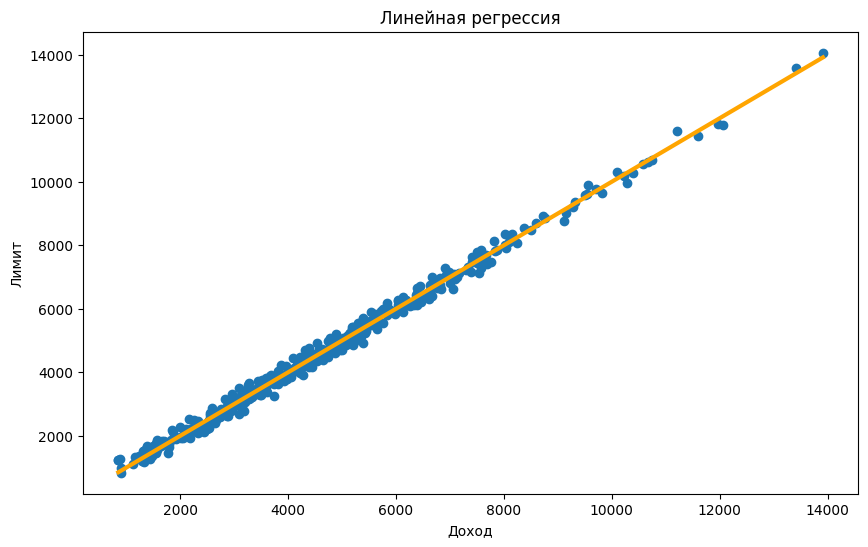

In [8]:
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'orange', lw=3)
plt.xlabel('Доход')
plt.ylabel('Лимит')
plt.title('Линейная регрессия')
plt.show()

Как можно заметить, баланс и доход влияют на лимит карты

## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

In [9]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})

In [11]:
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480,0,0,0
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138,1,0,1
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1


Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


In [12]:
credit_model = sm.ols(formula="Limit ~ Balance + Income + Gender_num", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1999.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.03e-236
Time:                        12:00:05   Log-Likelihood:                -3068.9
No. Observations:                 395   AIC:                             6146.
Df Residuals:                     391   BIC:                             6162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1603.6429     58.407     27.456      0.000    1488.812    1718.474
Balance        3.1609      0.071     44.458      0.000       3.021       3.301
Income         0.0328      0.001     35.426      0.000       0.031       0.035
Gender_num     0.8798     57.968      0.015      0.988    -113.089     114.848
==============================================================================
Omnibus:                       69.435   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.889
Skew:                          -1.259   Prob(JB):                     1.67e-23
Kurtosis:                       3.190   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ при добавлении категориальной переменной Гендер не изменилось, а P значение больше 0.05, значит модель не значима

In [13]:
credit_model = sm.ols(formula="Limit ~ Balance + Income + Student_num", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4810.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          3.55e-308
Time:                        12:00:27   Log-Likelihood:                -2902.6
No. Observations:                 395   AIC:                             5813.
Df Residuals:                     391   BIC:                             5829.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1668.5118     33.172     50.298      0.000    1603.294    1733.730
Balance         3.4753      0.049     71.408      0.000       3.380       3.571
Income          0.0311      0.001     50.814      0.000       0.030       0.032
Student_num -1494.0147     65.750    -22.723      0.000   -1623.283   -1364.747
==============================================================================
Omnibus:                       83.015   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.846
Skew:                          -1.277   Prob(JB):                     5.23e-30
Kurtosis:                       4.294   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ при добавлении категориальной переменной Студент немного изменилось и стало 0,974, а P значение меньше 0.05, значит модель значима и можно сделать вывод, что студенты отдают реже кредиты, чем не студенты, т.к. коэффициент -1494.0147

In [14]:
credit_model = sm.ols(formula="Limit~ Balance + Income + Married_num", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2009.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          3.95e-237
Time:                        12:01:04   Log-Likelihood:                -3067.9
No. Observations:                 395   AIC:                             6144.
Df Residuals:                     391   BIC:                             6160.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1554.8755     61.481     25.290      0.000    1434.001    1675.750
Balance         3.1633      0.071     44.601      0.000       3.024       3.303
Income          0.0328      0.001     35.426      0.000       0.031       0.035
Married_num    82.3963     59.367      1.388      0.166     -34.323     199.115
==============================================================================
Omnibus:                       69.415   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.747
Skew:                          -1.257   Prob(JB):                     1.80e-23
Kurtosis:                       3.203   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ при добавлении категориальной переменной Семейное полжения не изменилось, а P значение больше 0.05, значит модель не значима

**Ваш ответ:** Да, модель улучшена, включив в нее еще категориальную переменную Student, тем самым вид модели стал выглядеть следующим образом:
$$
\text{Limit} = \beta_0 + \beta_1 * \text{Balance} + \beta_2*\text{Income} + \beta_3*\text{Student}
$$
Если добавить в модель Married или Gender, то R-squared не изменится, но при этом P значение станет в категориальной переменной больше 0,05, тем самым модели имеют малую значимость.

Сделаем кросс-валидацию

In [28]:
credit.dropna(inplace=True)

In [27]:
from sklearn.preprocessing import OneHotEncoder

x = credit[['Balance', 'Income', 'Student_num']]
y = credit['Limit']

scores = cross_val_score(model, x, y, cv=5, scoring='r2')

print('Оценки R^2:', scores)
print('Средняя оценка R^2:', np.mean(scores))

Оценки R^2: [0.97585081 0.96794468 0.97691129 0.96303018 0.97775898]
Средняя оценка R^2: 0.972299187652766


Можно сделать вывод, что RMSE равное 0,97 указывает на то, что модель имеет довольно низкую ошибку на кросс-валидации

Построим график линейной регрессии с линией тренда

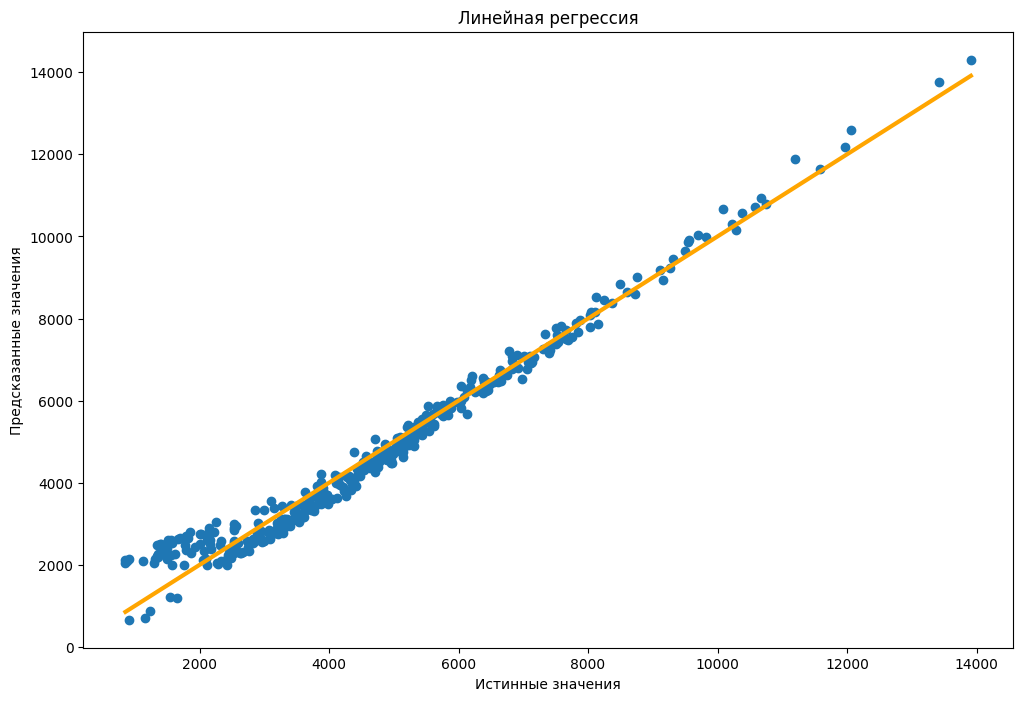

In [34]:
model.fit(x, y)
y_pred = model.predict(x)
plt.figure(figsize=(12, 8))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'orange', lw=3)  # Линия тренда
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия')
plt.show()

Как можно заметить, баланс, доход и является ли студентом человек влияют на лимит карты